In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import fitsio
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from glob import glob

import healpy as hp
import numpy as np
from pypower import CatalogFFTPower
from mockfactory import setup_logging, BoxCatalog, RandomBoxCatalog

import useful_functions as ut
# Set up logging
#setup_logging()


In [ ]:
from cosmoprimo.fiducial import DESI
# redshift parameters
zmin = 2.75
zmax =  3.25
zeff = (zmax + zmin)/2.
print(f"zmin={zmin}, zmax={zmax}, zeff={zeff}")

# change angular density to comoving density
nb_deg = 2500 # nbar in deg^-2 
nb = nb_deg

# Set other parameters
bias, nbar, nmesh, boxsize = 3.0, nb, 1024, 8000 # 3.0, nb, 256, 8000.
los = None #'x' # line of sight

# Loading DESI fiducial cosmology
cosmo = DESI()
power = cosmo.get_fourier().pk_interpolator().to_1d(z=zeff)
dist = cosmo.comoving_radial_distance(zeff)
dmin = cosmo.comoving_radial_distance(zmin)
dmax = cosmo.comoving_radial_distance(zmax)
f = cosmo.sigma8_z(z=zeff,of='theta_cb')/cosmo.sigma8_z(z=zeff,of='delta_cb') # growth rate
boxcenter = [dist, 0, 0]

In [ ]:
data_fn = '/pscratch/sd/a/arosado/lognormal_mocks/cubic/test1/data_cubic_3.0_2500.0_1024_8000.0_3.0_ph0001.fits'
data = BoxCatalog.read(data_fn, boxsize=boxsize, boxcenter=boxcenter, position='Position', velocity='Displacement')

In [5]:
data

BoxCatalog(csize=667135777, size=667135777, columns=['Position', 'Displacement'])

In [6]:
c = fitsio.read('/pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1.2/data_cutsky_3.0_2500.0_1024_8000.0_3.0_ph0001.fits')
c[c['mask_contiguous']].shape, c[c['mask_checkerboard']].shape

((10030721,), (10032378,))

In [7]:
rngal = 667135777 / 10030721
rngal

66.50925461888532

In [4]:
rands_fn = '/pscratch/sd/a/arosado/lognormal_mocks/cubic/test1/randoms_cubic_2500.0_8000.0_3.0_ph01.fits'
rands = RandomBoxCatalog.read(rands_fn, boxsize=boxsize, boxcenter=boxcenter, position='Position')

In [5]:
r = fitsio.read('/pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1.2/randoms_cutsky_2500.0_8000.0_3.0_ph01.fits')

In [6]:
rands, r[r['mask_contiguous']].shape

(RandomBoxCatalog(csize=667088831, size=667088831, columns=['Position']),
 (10010379,))

In [3]:
rrands = 667088831 / 10010379
rrands

66.6397177369608

# Pkplots


In [4]:
version = 'test1'
cutsky_version = 'test1.2'
nside = 256
base_dir = os.getenv("PSCRATCH")

pk_cubic_dir = os.path.join(base_dir, 'lognormal_mocks', 'results_pypower', version)
pk_dir = os.path.join(base_dir, 'lognormal_mocks', 'results_pypower', cutsky_version)
plot_dir = os.path.join(pk_dir, 'plots')
if not os.path.isdir(plot_dir):
    os.makedirs(plot_dir)
    print(f"created dir: {plot_dir}")

In [5]:
nmesh = 1024
dk=0.005
ell=0
cubic_pk_fns = glob(os.path.join(pk_cubic_dir, f"power_cubic_20_{nmesh}_dk{dk}_*.npy"))
contiguous_pk_fns = glob(os.path.join(pk_dir, f"power_cutsky_contiguous_20_{nmesh}_dk{dk}_*.npy"))
checkerboard_pk_fns = glob(os.path.join(pk_dir, f"power_cutsky_checkerboard_20_{nmesh}_dk{dk}_*.npy"))

In [6]:
len(cubic_pk_fns), len(contiguous_pk_fns), len(checkerboard_pk_fns)

(100, 100, 100)

Shot noise is 807.3673.
Shot noise is 821.5387.
Shot noise is 822.6953.


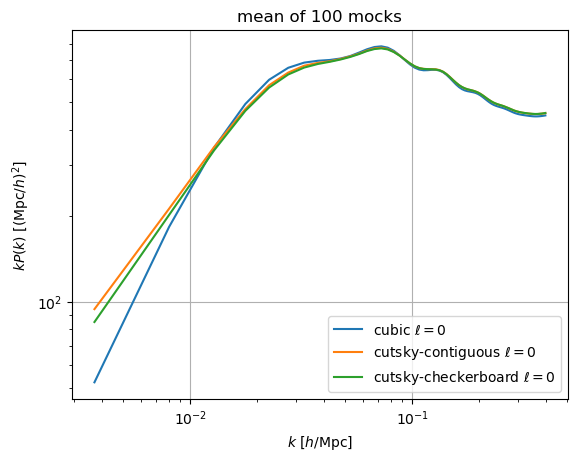

In [11]:
#nmesh = 1024
#ell=0
#cubic_pk_fns = glob(os.path.join(pk_dir, f"power_cubic_20_{nmesh}_????.npy"))
#contiguous_pk_fns = glob(os.path.join(pk_dir, f"power_cutsky_contiguous_20_{nmesh}_????.npy"))
#checkerboard_pk_fns = glob(os.path.join(pk_dir, f"power_cutsky_checkerboard_20_{nmesh}_????.npy"))

plt.clf() 
fig = plt.gcf()
ax = plt.gca()

fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    #print(len(fns))
    k,pk,sigma = ut.get_mean_pk(fns,ell=ell,remove_shotnoise=False)
    ax.plot(k, k*pk, label=f'{l[i]} $\ell = {ell}$')
ax.legend()
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title(f"mean of {len(fns)} mocks")
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

filename = os.path.join(plot_dir,f'pk_log_mean_{nmesh}_dk{dk}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

In [23]:
k,pk,sigma = ut.get_mean_pk(cubic_pk_fns,ell=ell,remove_shotnoise=False, rebin=5)
for i in range(len(k)-1):
    print(k[i+1] - k[i])

Shot noise is 807.3673.
0.021430067269011407
0.023967430778649337
0.024539894653414066
0.024739296993212104
0.024831497053506818
0.024882637960126713
0.024915420110609543
0.02493698685511858
0.024948714120663656
0.02495783300535162
0.024965855379234514
0.024970023358211524
0.02497516132625416
0.024979732303000268
0.02498157902009568


cubic
Shot noise is 807.3673.
mean shotnoise  807.3859608587533 

cutsky-contiguous
Shot noise is 821.5387.
mean shotnoise  819.2330564583868 

cutsky-checkerboard
Shot noise is 822.6953.
mean shotnoise  822.7658236470784 



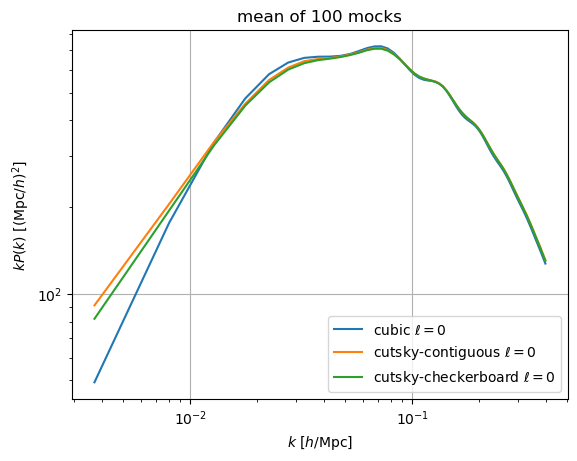

In [28]:
#nmesh = 1024
#ell=0
#cubic_pk_fns = glob(os.path.join(pk_dir, f"power_cubic_20_{nmesh}_????.npy"))
#contiguous_pk_fns = glob(os.path.join(pk_dir, f"power_cutsky_contiguous_20_{nmesh}_????.npy"))
#checkerboard_pk_fns = glob(os.path.join(pk_dir, f"power_cutsky_checkerboard_20_{nmesh}_????.npy"))

plt.clf() 
fig = plt.gcf()
ax = plt.gca()

fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    #print(len(fns))
    print(l[i])
    k,pk,sigma,snoise = ut.get_mean_pk(fns,ell=ell,remove_shotnoise=False, return_shotnoise=True)
    ax.plot(k, k*(pk-snoise), label=f'{l[i]} $\ell = {ell}$')
    print('mean shotnoise ',snoise,'\n')
    
ax.legend()
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title(f"mean of {len(fns)} mocks")
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

filename = os.path.join(plot_dir,f'pk_log_mean_{nmesh}_dk{dk}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

Shot noise is 807.3673.
Shot noise is 807.3673.
Shot noise is 821.5387.
Shot noise is 822.6953.


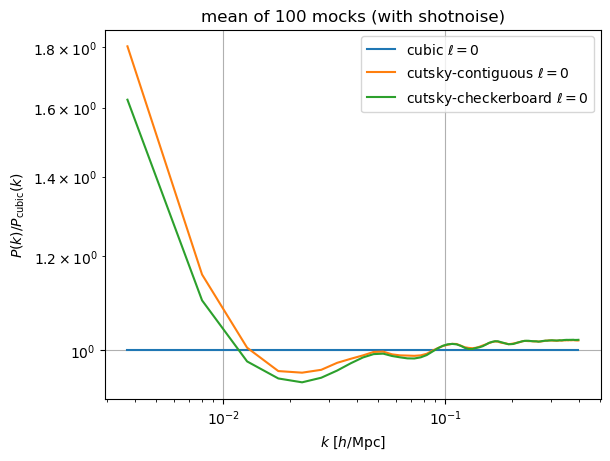

In [16]:
plt.clf() 
fig = plt.gcf()
ax = plt.gca()
_,pk_cubic,_ = ut.get_mean_pk(cubic_pk_fns,ell=ell,remove_shotnoise=False)
fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    #print(len(fns))
    k,pk,sigma = ut.get_mean_pk(fns,ell=ell,remove_shotnoise=False)
    ax.plot(k, pk/pk_cubic, label=f'{l[i]} $\ell = {ell}$')
ax.legend()
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title(f"mean of {len(fns)} mocks (with shotnoise)")
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$P(k)/P_\mathrm{cubic}(k)$')

filename = os.path.join(plot_dir,f'pk_pkcubic_log_mean_shotnoise_{nmesh}_dk{dk}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

Shot noise is 807.3673.
Shot noise is 821.5387.
Shot noise is 822.6953.
Shot noise is 807.3673.


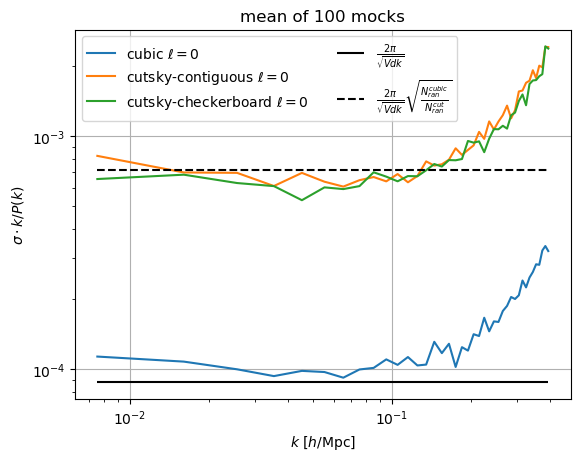

In [9]:
plt.clf() 
fig = plt.gcf()
ax = plt.gca()
rebin = 2 
remove_shotnoise = True
fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    #print(len(fns))
    #k,pk,sigma = ut.get_mean_pk(fns,ell=ell,remove_shotnoise=False, rebin=False)
    k_b,pk_b,sigma_b = ut.get_mean_pk(fns,ell=ell,remove_shotnoise=remove_shotnoise, rebin=rebin)
    #ax.plot(k, sigma*k/pk, label=f'{l[i]} $\ell = {ell}$')
    ax.plot(k_b, sigma_b*k_b/pk_b, label=f'{l[i]} $\ell = {ell}$')

dk_rebinned = dk * rebin
k_cubic,pk_cubic,sigma_cubic = ut.get_mean_pk(cubic_pk_fns,ell=ell,remove_shotnoise=remove_shotnoise, rebin=rebin)   
#ax.plot(k_cubic,np.sqrt(rrands)*sigma_cubic*k_cubic/pk_cubic, color='b', ls='--')
y = 2*np.pi/np.sqrt(8000**3*dk_rebinned)
ax.hlines(y,xmin=k_cubic.min(),xmax=k_cubic.max(), color='k', ls='-',label=r"$\frac{2\pi}{\sqrt{Vdk}}$")
ax.hlines(y*np.sqrt(rrands),xmin=k_cubic.min(),xmax=k_cubic.max(), color='k', ls='--',label=r"$\frac{2\pi}{\sqrt{Vdk}}\sqrt{\frac{N^{cubic}_{ran}}{N^{cut}_{ran}}}$")
y2 = [2*np.pi/np.sqrt(8000**3*k_cubic[0])]
for i in range(len(k_cubic)-1):
    y2.append(2*np.pi/np.sqrt(8000**3*(k_cubic[i+1] - k_cubic[i])))
#ax.plot(k_cubic, y2, color='y')
ax.legend(ncol=2)
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
if remove_shotnoise:
    plt.title(f"mean of {len(fns)} mocks")
    filename = os.path.join(plot_dir,f'sigma_pk_log_mean_{nmesh}_dk{dk_rebinned}.png')
else:
    plt.title(f"mean of {len(fns)} mocks (with shotnoise)")
    filename = os.path.join(plot_dir,f'sigma_pk_log_mean_shotnoise_{nmesh}_dk{dk_rebinned}.png')
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$\sigma \cdot k/P(k)$')
fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

In [41]:
y2 = [2*np.pi/np.sqrt(8000**3*k_cubic[0])]
for i in range(len(k_cubic)-1):
    y2.append(2*np.pi/np.sqrt(8000**3*(k_cubic[i+1] - k_cubic[i])))

0.007517972588888215

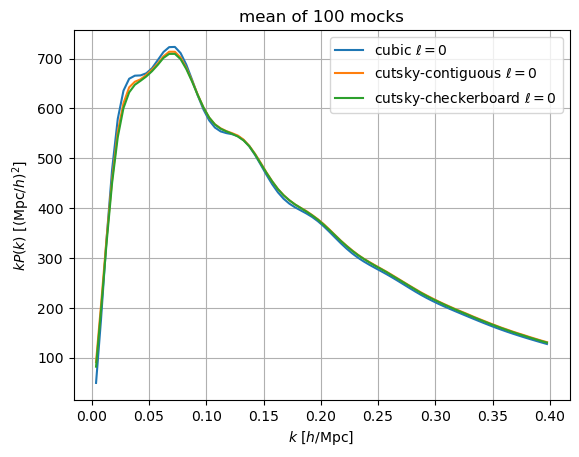

CPU times: user 607 ms, sys: 388 ms, total: 994 ms
Wall time: 1.11 s


In [9]:
%%time

plt.clf() 
fig = plt.gcf()
ax = plt.gca()

fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    #print(len(fns))
    k,pk,sigma = ut.get_mean_pk(fns,ell=ell)
    ax.plot(k,k*pk, label=f'{l[i]} $\ell = {ell}$')
ax.legend()
ax.grid(True)
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.title(f"mean of {len(fns)} mocks")
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

filename = os.path.join(plot_dir,f'pk_mean_{nmesh}_dk{dk}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

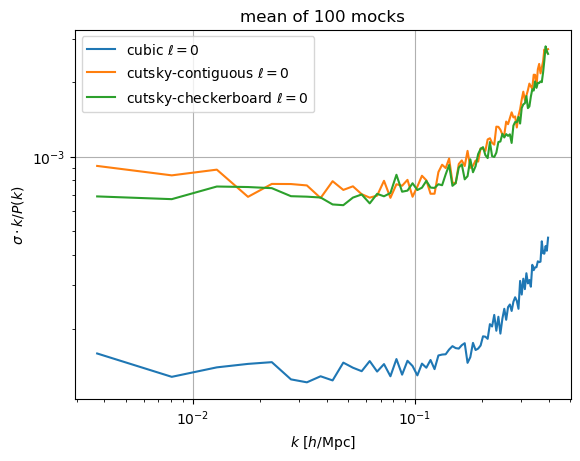

In [10]:
plt.clf() 
fig = plt.gcf()
ax = plt.gca()

fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    #print(len(fns))
    k,pk,sigma = ut.get_mean_pk(fns,ell=ell)
    ax.plot(k, sigma*k/pk, label=f'{l[i]} $\ell = {ell}$')
ax.legend()
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title(f"mean of {len(fns)} mocks")
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$\sigma \cdot k/P(k)$')

filename = os.path.join(plot_dir,f'sigma_pk_log_mean_{nmesh}_dk{dk}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

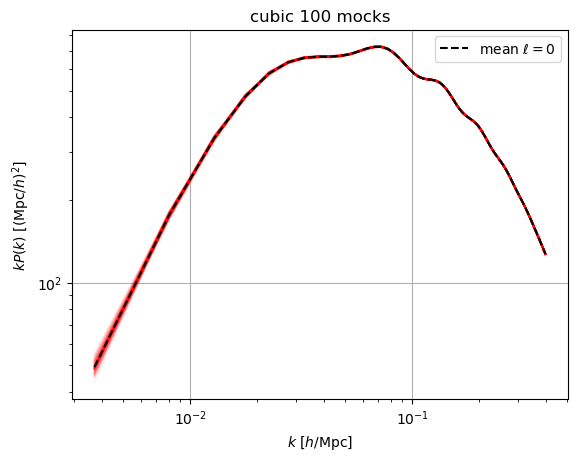

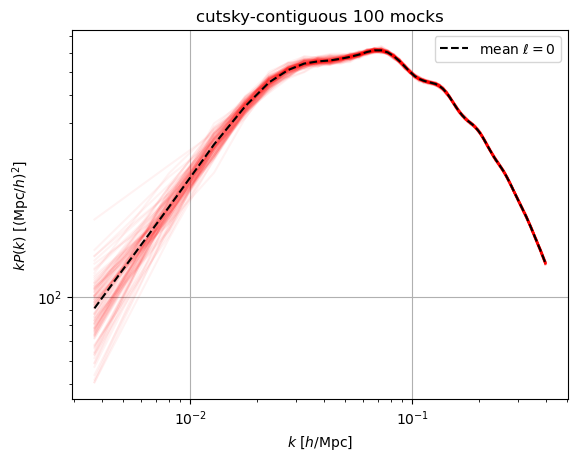

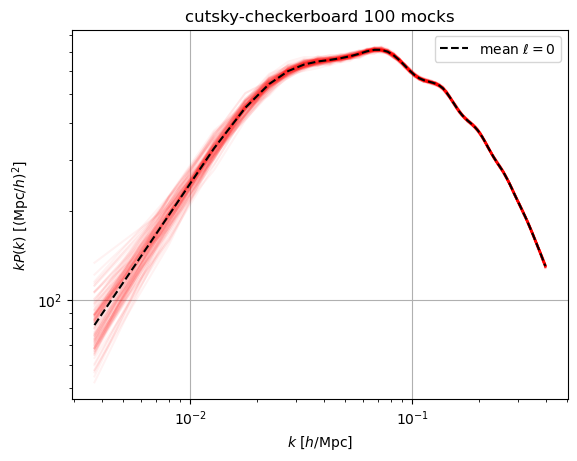

In [11]:
fns_list = [cubic_pk_fns, contiguous_pk_fns, checkerboard_pk_fns]
l = ['cubic','cutsky-contiguous','cutsky-checkerboard']
for i,fns in enumerate(fns_list):
    plt.clf() 
    fig = plt.gcf()
    ax = plt.gca()
    for fn in fns:
        result = CatalogFFTPower.load(fn)
        poles= result.poles
        k,pk = poles(ell=ell, return_k=True, complex=False)
        ax.plot(k, k*pk, c='r', alpha=0.05)
        
    k,pk,sigma = ut.get_mean_pk(fns,ell=ell)
    ax.plot(k, k*pk, label=f'mean $\ell = {ell}$', c='k', ls='--')
    ax.legend()
    ax.grid(True)
    ax.set_yscale('log')
    ax.set_xscale('log')
    plt.title(f"{l[i]} {len(fns)} mocks")
    ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
    plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

    filename = os.path.join(plot_dir,f'pk_mean_{l[i]}_{nmesh}_dk{dk}.png')
    #fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
    plt.show()

# Test

In [4]:
diff_dec([27.5,32.5])

array([4.32875316])

In [6]:
diff_dec([0,5])

array([4.99365622])

In [5]:
full_sky = radecbox_area([0,360], [-90,90])
print(full_sky/41252.96125)

0.9999999999859227


solid angle $d\Omega = \sin(\theta) d\theta \cdot d\phi$

$$
A_\text{rad} = \left(\sin(\text{dec}_{\text{max}}) - \sin(\text{dec}_{\text{min}}) \right) \cdot \Delta \text{ra}
$$

$$
\sin(\text{dec}_{\text{min}}) = \sin(\text{dec}_{\text{max}}) - \frac{A_\text{rad}}{\Delta \text{ra}} 
$$

$$
\text{dec}_{\text{min}} = \sin^{-1}\left(\sin(\text{dec}_{\text{max}}) - \frac{A_\text{rad}}{\Delta \text{ra}}\right) 
$$

In [9]:
def find_decmin(area, rarange, decmax):
    rafrac = np.diff(rarange, axis=0)
    #return np.rad2deg(np.arcsin(np.deg2rad(area/rafrac) + np.sin(np.deg2rad(decmax))))
    return np.sin(np.deg2rad(decmax)) - np.deg2rad(area/rafrac)

def find_ramin(area, decrange, ramax):
    decfrac = np.rad2deg(np.diff(np.sin(np.deg2rad(decrange)), axis=0))
    ramin = ramax - area/decfrac
    
    return ramin

def find_rarange(area,decrange):
    decfrac = np.rad2deg(np.diff(np.sin(np.deg2rad(decrange)), axis=0))
    return area/decfrac

In [13]:
decrange =  [-10,70]
find_rarange(5000,decrange)

array([78.38252467])

In [8]:
rarange = [175,290]
decrange =  [-10,70]
test_area = radecbox_area(rarange,decrange)
test_ramin = find_ramin(test_area, decrange, rarange[1])
test_rarange = [test_ramin[0],rarange[1]]
print(test_rarange)
print(test_area, radecbox_area(test_rarange,decrange))

[175.0, 290]
7335.81882477338 7335.81882477338


In [84]:
test = find_ramin(radecbox_area([0,360], [-90,90]), [-10,70], 360)
print(test)
print(f"{test[0]:.2f}")

[-2.53123744e-10]
-0.00


In [85]:
test = find_ramin(radecbox_area([0,115], [-10,70]), [-10,70], 115)
print(test)
print(f"{test[0]:.2f}")

[286.70225056]
286.70


In [36]:
find_decmin(5946.082747085439, [175,290], 70)
rafrac = np.diff([175,290], axis=0)
np.deg2rad(np.rad2deg(np.sin(np.deg2rad(70))) - 5946.082747085439/rafrac)

array([0.03726896])

In [31]:
np.arcsin(1.84211629/ np.pi)

0.6265626710245088

In [32]:
1.84211629/ np.pi

0.5863638266072068

In [87]:
# solid angel $$
decmin, decmax = np.deg2rad([-70,10])
decfrac = np.diff([np.sin(decmin),np.sin(decmax)],axis=0)
print(decmin,decmax,decfrac)

ramin, ramax = 175,290
rafrac = np.diff([ramin,ramax],axis=0)
print(ramin,ramax,rafrac)

Arad = decfrac * rafrac
Adeg = np.rad2deg(Arad)
print(Arad,Adeg)

-1.2217304763960306 0.17453292519943295 [1.1133408]
175 290 [115]
[128.03419182] [7335.81882477]


In [38]:
rarange = [175,290]
decrange = [-10,70]
contiguous_sky = radecbox_area(rarange, decrange)
checkered_sky = radecbox_area([175,275], [-10,60])
diff = abs(np.diff([contiguous_sky, checkered_sky]))
print(contiguous_sky, checkered_sky, diff)

7335.81882477338 5956.890828841426 [1378.92799593]


In [27]:
sep=5 # separation between patches in degrees
nchunks_ra = 4
nchunks_dec = 2
l = []
ramin,ramax = rarange
decmin, decmax = decrange
#for i in range(0,5):
#area = radecbox_area([175,290-step*3], [-10,70-step])
new_rarange = [ramax-sep*(nchunks_ra-1),ramax]
new_decrange = [decmin,decmax-sep*(nchunks_dec-1)]
print(new_rarange, new_decrange)
area = radecbox_area(new_rarange, new_decrange)
print(f"area of ra, dec box {area}")
l.append(area)
print(f'total sky area removed: {np.sum(l)}')

[275, 290] [-10, 65]
area of ra, dec box 928.1537825624167
total sky area removed: 928.1537825624167


In [29]:
contiguous_sky - np.sum(l)

6407.665042210963

In [30]:
contiguous_sky - 5946.082747085439

1389.7360776879405

In [24]:
rarange_list = split_range(ramin,ramax, nchunks=4,sep=5)
decrange_list = split_range(decmin,decmax, nchunks=2,sep=5)
print(f"Choosing distance, RA, Dec ranges:")
print(f"RA ranges: {rarange_list}")
print(f"DEC ranges: {decrange_list}")

Choosing distance, RA, Dec ranges:
RA ranges: [[175.0, 200.0], [205.0, 230.0], [235.0, 260.0], [265.0, 290.0]]
DEC ranges: [[-10.0, 27.5], [32.5, 70.0]]


In [32]:
sep=5 # separation between patches in degrees
nchunks_ra = 4
nchunks_dec = 2
l = []
for decran in decrange_list:
    for raran in rarange_list:
        area = radecbox_area(raran, decran)
        #print(f"area of ra, dec box {area}")
        l.append(area)
print(f'total sky area removed: {np.sum(l)}')

total sky area removed: 5946.097575315378


In [70]:
decrange = [0,10]
decfrac = np.diff(np.rad2deg(np.sin(np.deg2rad(decrange))), axis=0)
decfrac

array([9.9493077])

In [56]:
np.diff([32.5, 70.0])*2+5

array([80.])

In [40]:
radecbox_area([175,275], [-10,65])

6187.691883749445

In [40]:
np.diff([[175.0, 200.0], [205.0, 230.0], [235.0, 260.0], [265.0, 290.0]])[0]

array([25.])

[000074.55] [0/1] 04-23 11:40  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/results_pypower/test1/power_cubic_20_1024_0001.npy.
Shot noise is 807.3347.
Normalization is 867663.5717.
[000074.56] [0/1] 04-23 11:40  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/results_pypower/test1/power_cubic_20_1024_0002.npy.
Shot noise is 807.3856.
Normalization is 867546.9483.
[000074.56] [0/1] 04-23 11:40  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/results_pypower/test1/power_cubic_20_1024_0003.npy.
Shot noise is 807.3801.
Normalization is 867569.8741.
[000074.56] [0/1] 04-23 11:40  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/results_pypower/test1/power_cubic_20_1024_0004.npy.
Shot noise is 807.3738.
Normalization is 867569.8340.
[000074.57] [0/1] 04-23 11:40  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/results_pyp

NameError: name 'plot_dir' is not defined

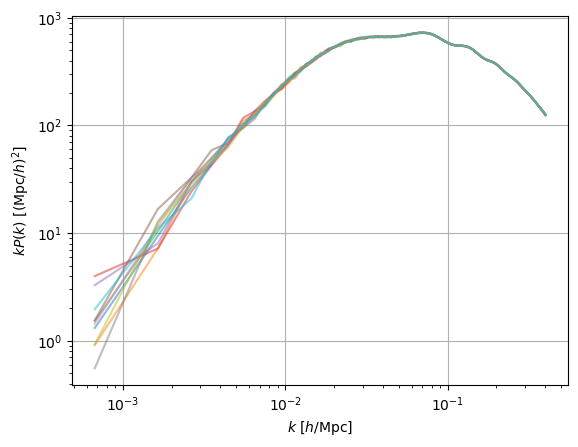

In [4]:
plt.clf() 
fig = plt.gcf()
ax = plt.gca()

ell=0
i=0
#fns = [fn_cubic, fn_contiguous, fn_concat]
l = ['cubic','cutsky-contiguous','cutsky']
nmesh = 1024
for ind in range(1,11):
    ph = str(ind).zfill(4)
    #result = CatalogFFTPower.load(f'/global/cscratch1/sd/arosado/lognormal_mocks/results_pypower/test1/power_cubic_20_1024_{ph}.npy')
    result = CatalogFFTPower.load(f'/pscratch/sd/a/arosado/lognormal_mocks/results_pypower/test1/power_cubic_20_1024_{ph}.npy')
    poles= result.poles

    print('Shot noise is {:.4f}.'.format(poles.shotnoise)) # cross-correlation, shot noise is 0.
    print('Normalization is {:.4f}.'.format(poles.wnorm))

    k,pk = poles(ell=ell, return_k=True, complex=False)
    ax.plot(k, k*pk, alpha=0.5,label=f'{l[i]} $\ell = {ell}$')
#ax.legend()
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

filename = os.path.join(plot_dir,f'pk_log_{nmesh}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

# Plot Pk

In [6]:
version = 'test1'
nside = 256
base_dir = os.getenv("PSCRATCH")
cutsky_dir = os.path.join(base_dir, 'lognormal_mocks', 'cutsky', version)
plot_dir = os.path.join(cutsky_dir, 'plots')

[000008.15] [0/1] 04-14 22:05  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/power_1024_cubic.npy.
Shot noise is 1922.2674.
Normalization is 216914.1706.
[000008.15] [0/1] 04-14 22:05  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1/power_1024_contiguous.npy.
Shot noise is 1946.4887.
Normalization is 5899.5493.
[000008.15] [0/1] 04-14 22:05  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1/power_1024_concat.npy.
Shot noise is 1951.7529.
Normalization is 4771.4566.


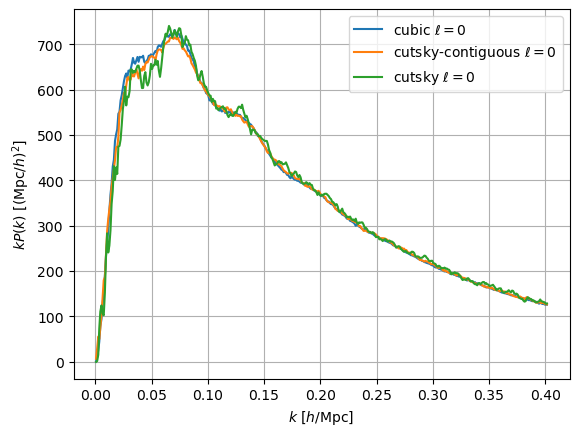

In [4]:
nmesh = 1024

plt.clf() 
fig = plt.gcf()
ax = plt.gca()

fn_cubic = f'/pscratch/sd/a/arosado/lognormal_mocks/power_{nmesh}_cubic.npy'
fn_contiguous = f'/pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1/power_{nmesh}_contiguous.npy'
fn_concat = f'/pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1/power_{nmesh}_concat.npy'

ell=0
fns = [fn_cubic, fn_contiguous, fn_concat]
l = ['cubic','cutsky-contiguous','cutsky']
for i,fn in enumerate(fns):
    result = CatalogFFTPower.load(fn)
    poles= result.poles

    print('Shot noise is {:.4f}.'.format(poles.shotnoise)) # cross-correlation, shot noise is 0.
    print('Normalization is {:.4f}.'.format(poles.wnorm))
    
    k,pk = poles(ell=ell, return_k=True, complex=False)
    ax.plot(k, k*pk, label=f'{l[i]} $\ell = {ell}$')
ax.legend()
ax.grid(True)
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

filename = os.path.join(plot_dir,f'pk_{nmesh}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

[000009.15] [0/1] 04-14 22:05  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/power_1024_cubic.npy.
Shot noise is 1922.2674.
Normalization is 216914.1706.
[000009.15] [0/1] 04-14 22:05  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1/power_1024_contiguous.npy.
Shot noise is 1946.4887.
Normalization is 5899.5493.
[000009.15] [0/1] 04-14 22:05  CatalogFFTPower           INFO     Loading /pscratch/sd/a/arosado/lognormal_mocks/cutsky/test1/power_1024_concat.npy.
Shot noise is 1951.7529.
Normalization is 4771.4566.


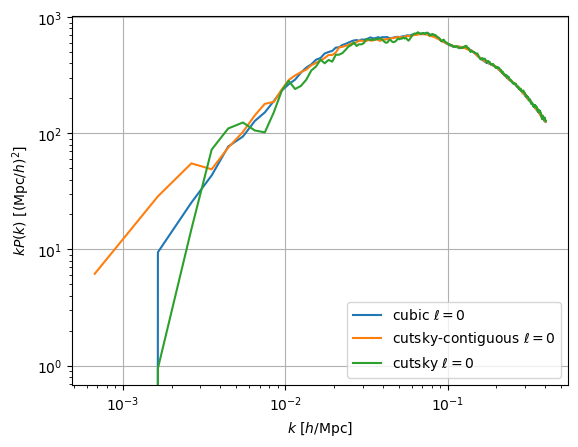

In [5]:
plt.clf() 
fig = plt.gcf()
ax = plt.gca()

for i,fn in enumerate(fns):
    result = CatalogFFTPower.load(fn)
    poles= result.poles

    print('Shot noise is {:.4f}.'.format(poles.shotnoise)) # cross-correlation, shot noise is 0.
    print('Normalization is {:.4f}.'.format(poles.wnorm))
    
    k,pk = poles(ell=ell, return_k=True, complex=False)
    ax.plot(k, k*pk, label=f'{l[i]} $\ell = {ell}$')
ax.legend()
ax.grid(True)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$k$ [$h/\mathrm{Mpc}$]')
plt.ylabel(r'$kP(k)$ [$(\mathrm{Mpc}/h)^{2}$]')

filename = os.path.join(plot_dir,f'pk_log_{nmesh}.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

# Read data and concatenate patches

In [4]:
version = 'test1'
nside = 256
base_dir = os.getenv("PSCRATCH")
cutsky_dir = os.path.join(base_dir, 'lognormal_mocks', 'cutsky', version)
plot_dir = os.path.join(cutsky_dir, 'plots')

TypeError: expected str, bytes or os.PathLike object, not NoneType

In [21]:
radecbox_area([175,290], [-10,70])

7335.81882477338

In [4]:
%%time 
# load full data and randoms
data_fn = os.path.join(cutsky_dir, 'data_cutsky_3.0_1250.0_1024_8000.0_3.0.fits')
data_full = fitsio.read(data_fn)
rands_fn = os.path.join(cutsky_dir, 'randoms_cutsky_3.0_1250.0_1024_8000.0_3.0.fits')
randoms_full = fitsio.read(rands_fn)

CPU times: user 0 ns, sys: 1.82 s, total: 1.82 s
Wall time: 1.82 s


In [5]:
ra,dec = data_full['RA'], data_full['DEC']
rarange = [ra.min(),ra.max()]
decrange = [dec.min(),dec.max()]
skyarea_contiguous = radecbox_area(rarange, decrange)
print(f"area of ra, dec box {skyarea_contiguous}")

area of ra, dec box 7335.816593720881


In [6]:
%%time
data_fns = glob(os.path.join(cutsky_dir, f"data_cutsky_3.0_1250.0_1024_8000.0_3.0_?_?.fits"))
rands_fns = glob(os.path.join(cutsky_dir, f"randoms_cutsky_3.0_1250.0_1024_8000.0_3.0_?_?.fits"))

data = stack_fits(data_fns)
#data.write(os.path.join(cutsky_dir, f"data_cutsky_3.0_2500.0_1024_8000.0_3.0_concat.fits"))

rands = stack_fits(rands_fns)
#rands.write(os.path.join(cutsky_dir, f"randoms_cutsky_3.0_2500.0_1024_8000.0_3.0_concat.fits"))

CPU times: user 3.26 s, sys: 5.68 s, total: 8.94 s
Wall time: 8.97 s


In [8]:
l=[]
for fn in data_fns:
    #print(fn)
    d = fitsio.read(fn)
    ra,dec = d['RA'], d['DEC']
    rarange = [ra.min(),ra.max()]
    decrange = [dec.min(),dec.max()]
    #print(f"rarange: {rarange}, decrange: {decrange}")
    area = radecbox_area(rarange, decrange)
    #print(f"area of ra, dec box {area}")
    l.append(area)
    #print('\n')
print(f'total sky area: {np.sum(l)}')

total sky area: 5946.082747085439


In [9]:
skyarea_contiguous - np.sum(l)

1389.7338466354422

In [10]:
ra,dec = data['RA'], data['DEC']
rarange = [ra.min(),ra.max()]
decrange = [dec.min(),dec.max()]

print(f"area of ra, dec box {radecbox_area(rarange, decrange)}")

area of ra, dec box 7335.814010823958


In [11]:
step=5
nchunks_ra = 4
nchunks_dec = 2
l = []
#for i in range(0,5):
#area = radecbox_area([175,290-step*3], [-10,70-step])
new_rarange = [ra.max()-step*(nchunks_ra-1),ra.max()]
new_decrange = [dec.min(),dec.max()-step*(nchunks_dec-1)]
print(new_rarange, new_decrange)
area = radecbox_area(new_rarange, new_decrange)
print(f"area of ra, dec box {area}")
l.append(area)
print(f'total sky area removed: {np.sum(l)}')

[274.99998559643143, 289.99998559643143] [-9.999976806595622, 64.99998811244505]
area of ra, dec box 928.1533645882539
total sky area removed: 928.1533645882539


In [18]:
ra_array = np.linspace(new_rarange[0],new_rarange[1],100)
dec_array = np.linspace(new_decrange[0],new_decrange[1],100)


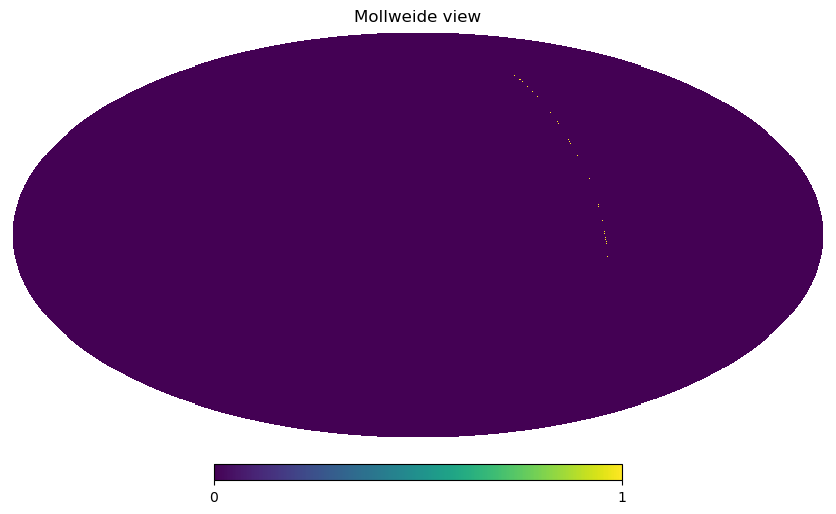

In [21]:
data_hpmap = hpixsum(nside,ra_array,dec_array)
hp.mollview(data_hpmap)

In [24]:
#data.write(os.path.join(cutsky_dir, 'data_cutsky_3.0_1250.0_1024_8000.0_3.0_concat.fits'))

In [25]:
#rands.write(os.path.join(cutsky_dir, 'randoms_cutsky_3.0_1250.0_1024_8000.0_3.0_concat.fits'))

# Plots

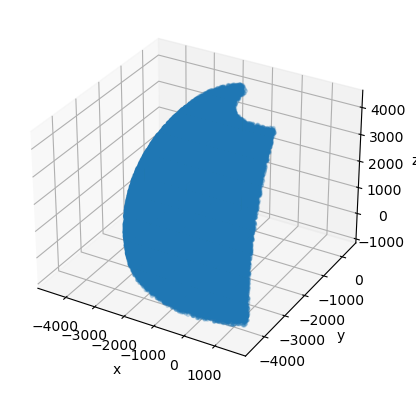

In [15]:
plot_in_box(data_full)
plt.show()

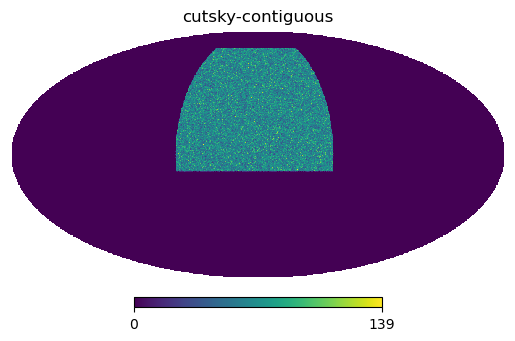

In [18]:
plt.clf() 
fig = plt.gcf()

plot_mollview(data_full, nside, rot=-130, title='cutsky-contiguous', hold=True)
filename = os.path.join(plot_dir,f'cutsky_contiguous.png')
#fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

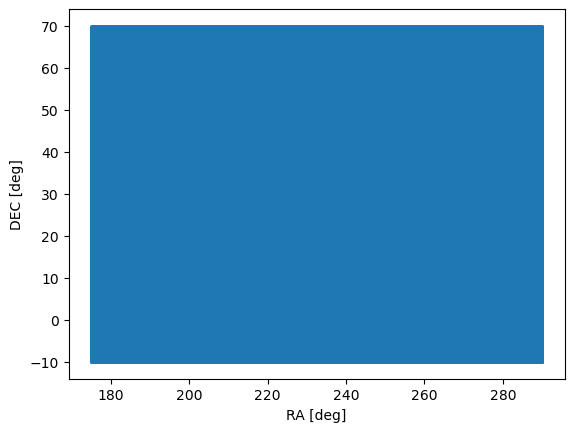

CPU times: user 2.68 s, sys: 192 ms, total: 2.87 s
Wall time: 2.73 s


In [51]:
%%time
densmap(data_full,s=0.2)
plt.show()

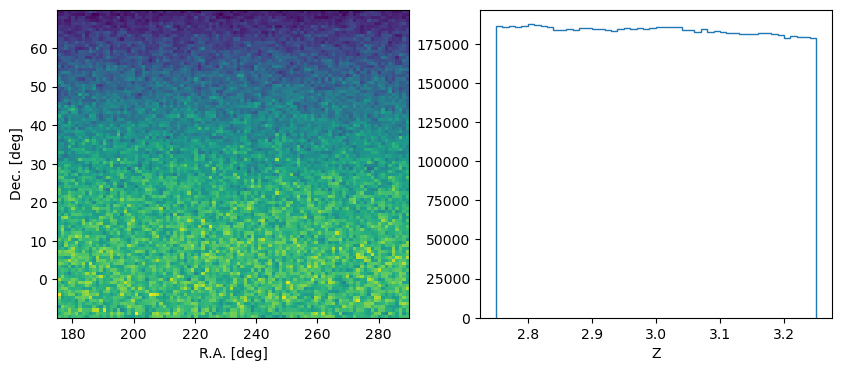

In [52]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)#, title='angular selection')
ax.hist2d(data_full['RA'], data_full['DEC'], bins=100)
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec. [deg]')
ax = fig.add_subplot(122)#, title='radial selection')
ax.hist(data_full['Z'], histtype='step', bins=50)
ax.set_xlabel('Z')
plt.show()

CPU times: user 19.6 ms, sys: 6.04 ms, total: 25.6 ms
Wall time: 16.7 ms


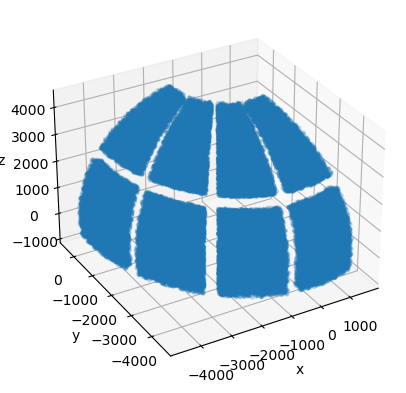

In [19]:
%%time 
plot_in_box(data,azim=-120)

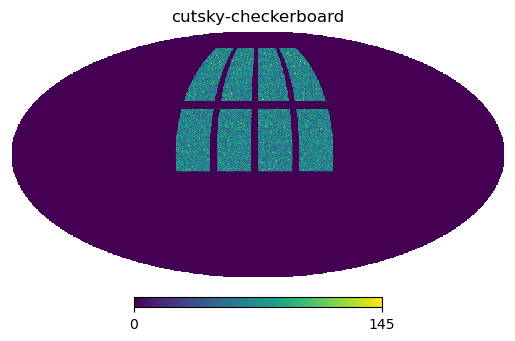

In [20]:
plt.clf() 
fig = plt.gcf()
plot_mollview(data, nside, rot=-130, title='cutsky-checkerboard', hold=True)
filename = os.path.join(plot_dir,f'cutsky_checkerboard.png')
fig.savefig(filename, bbox_inches='tight', pad_inches=0.1, dpi=200, facecolor='white')
plt.show()

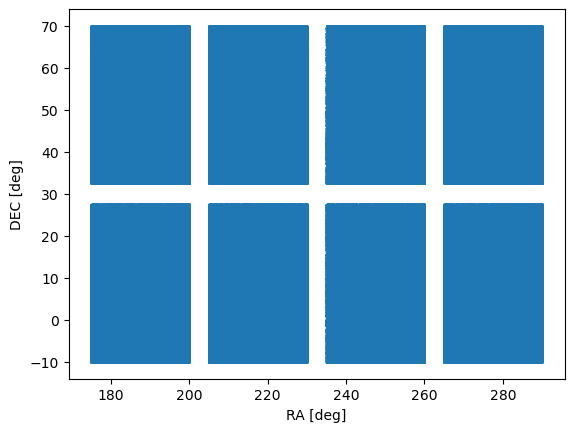

CPU times: user 2.04 s, sys: 167 ms, total: 2.21 s
Wall time: 2.07 s


In [57]:
%%time
densmap(data,s=0.2)
plt.show()

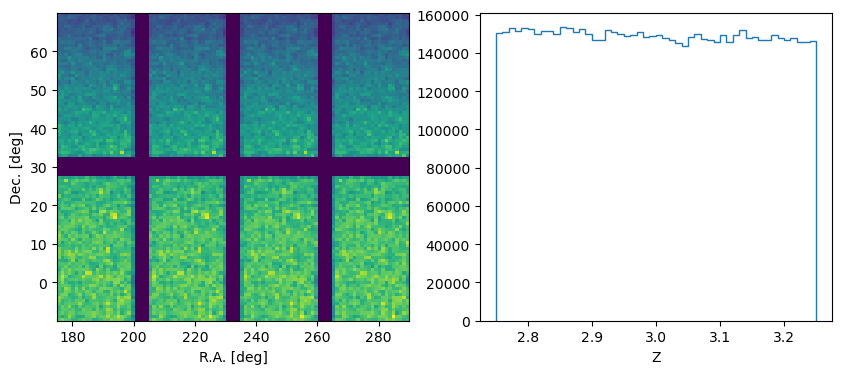

In [58]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)#, title='angular selection')
ax.hist2d(data['RA'], data['DEC'], bins=100)
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec. [deg]')
ax = fig.add_subplot(122)#, title='radial selection')
ax.hist(data['Z'], histtype='step', bins=50)
ax.set_xlabel('Z')
plt.show()

In [8]:
d = fitsio.read('/pscratch/sd/a/arosado/mocks_tests/old/data_2.3_1024_1.fits')
d1 = fitsio.read('/pscratch/sd/a/arosado/mocks_tests/old/data_2.3_1024_1_test.fits')

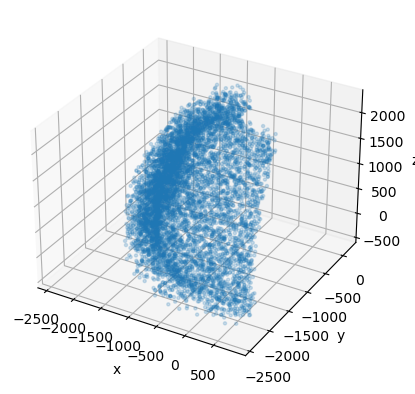

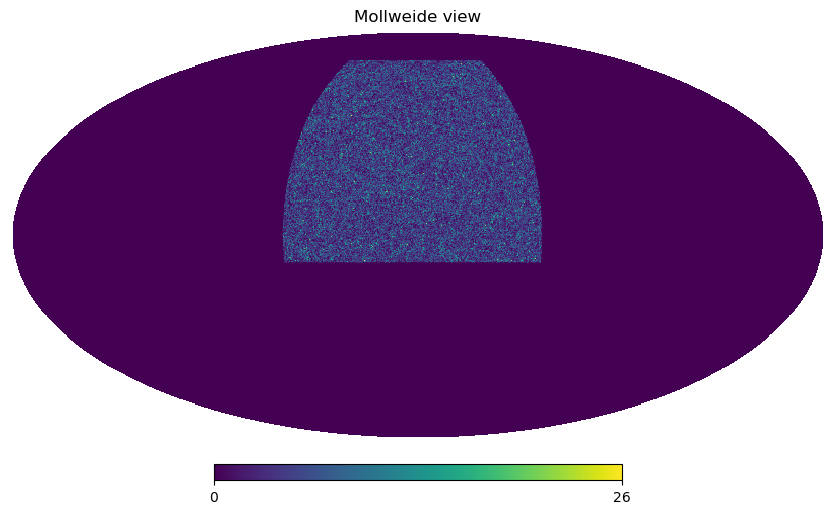

In [9]:
nside =256

plot_in_box(d1)
plt.show()

plot_mollview(d1, nside, rot=-130)
plt.show()

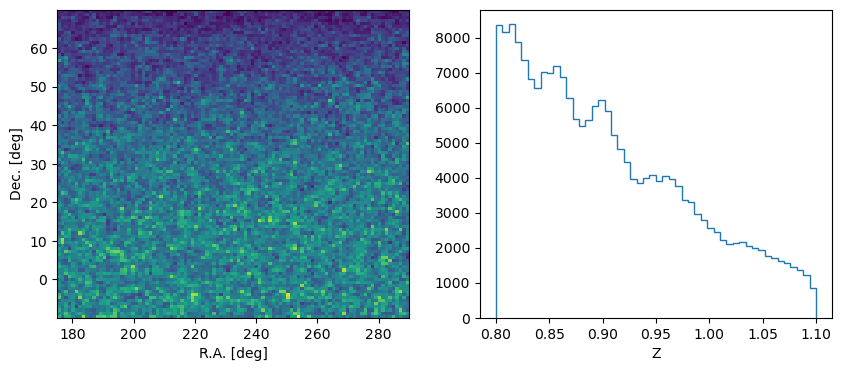

In [10]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(121)#, title='angular selection')
ax.hist2d(d1['RA'], d1['DEC'], bins=100)
ax.set_xlabel('R.A. [deg]')
ax.set_ylabel('Dec. [deg]')
ax = fig.add_subplot(122)#, title='radial selection')
ax.hist(d['Z'], histtype='step', bins=50)
ax.set_xlabel('Z')
plt.show()